In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
data =pd.read_csv(r"C:\Users\Manali\Desktop\datasets\student-mat.csv")

In [27]:
data.dropna(inplace=True)
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [28]:
cols_with_obj_type = [c for c,d in zip(data.columns,data.dtypes) if d == np.object]


In [5]:
label_encoder = LabelEncoder()
Scaler = StandardScaler()

In [6]:
for col in cols_with_obj_type:
    data[col] = label_encoder.fit_transform(data[col])


In [7]:
db = Scaler.fit_transform(data)

In [8]:
db = pd.DataFrame(db, columns=data.columns)

In [9]:
db.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,...,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,...,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739


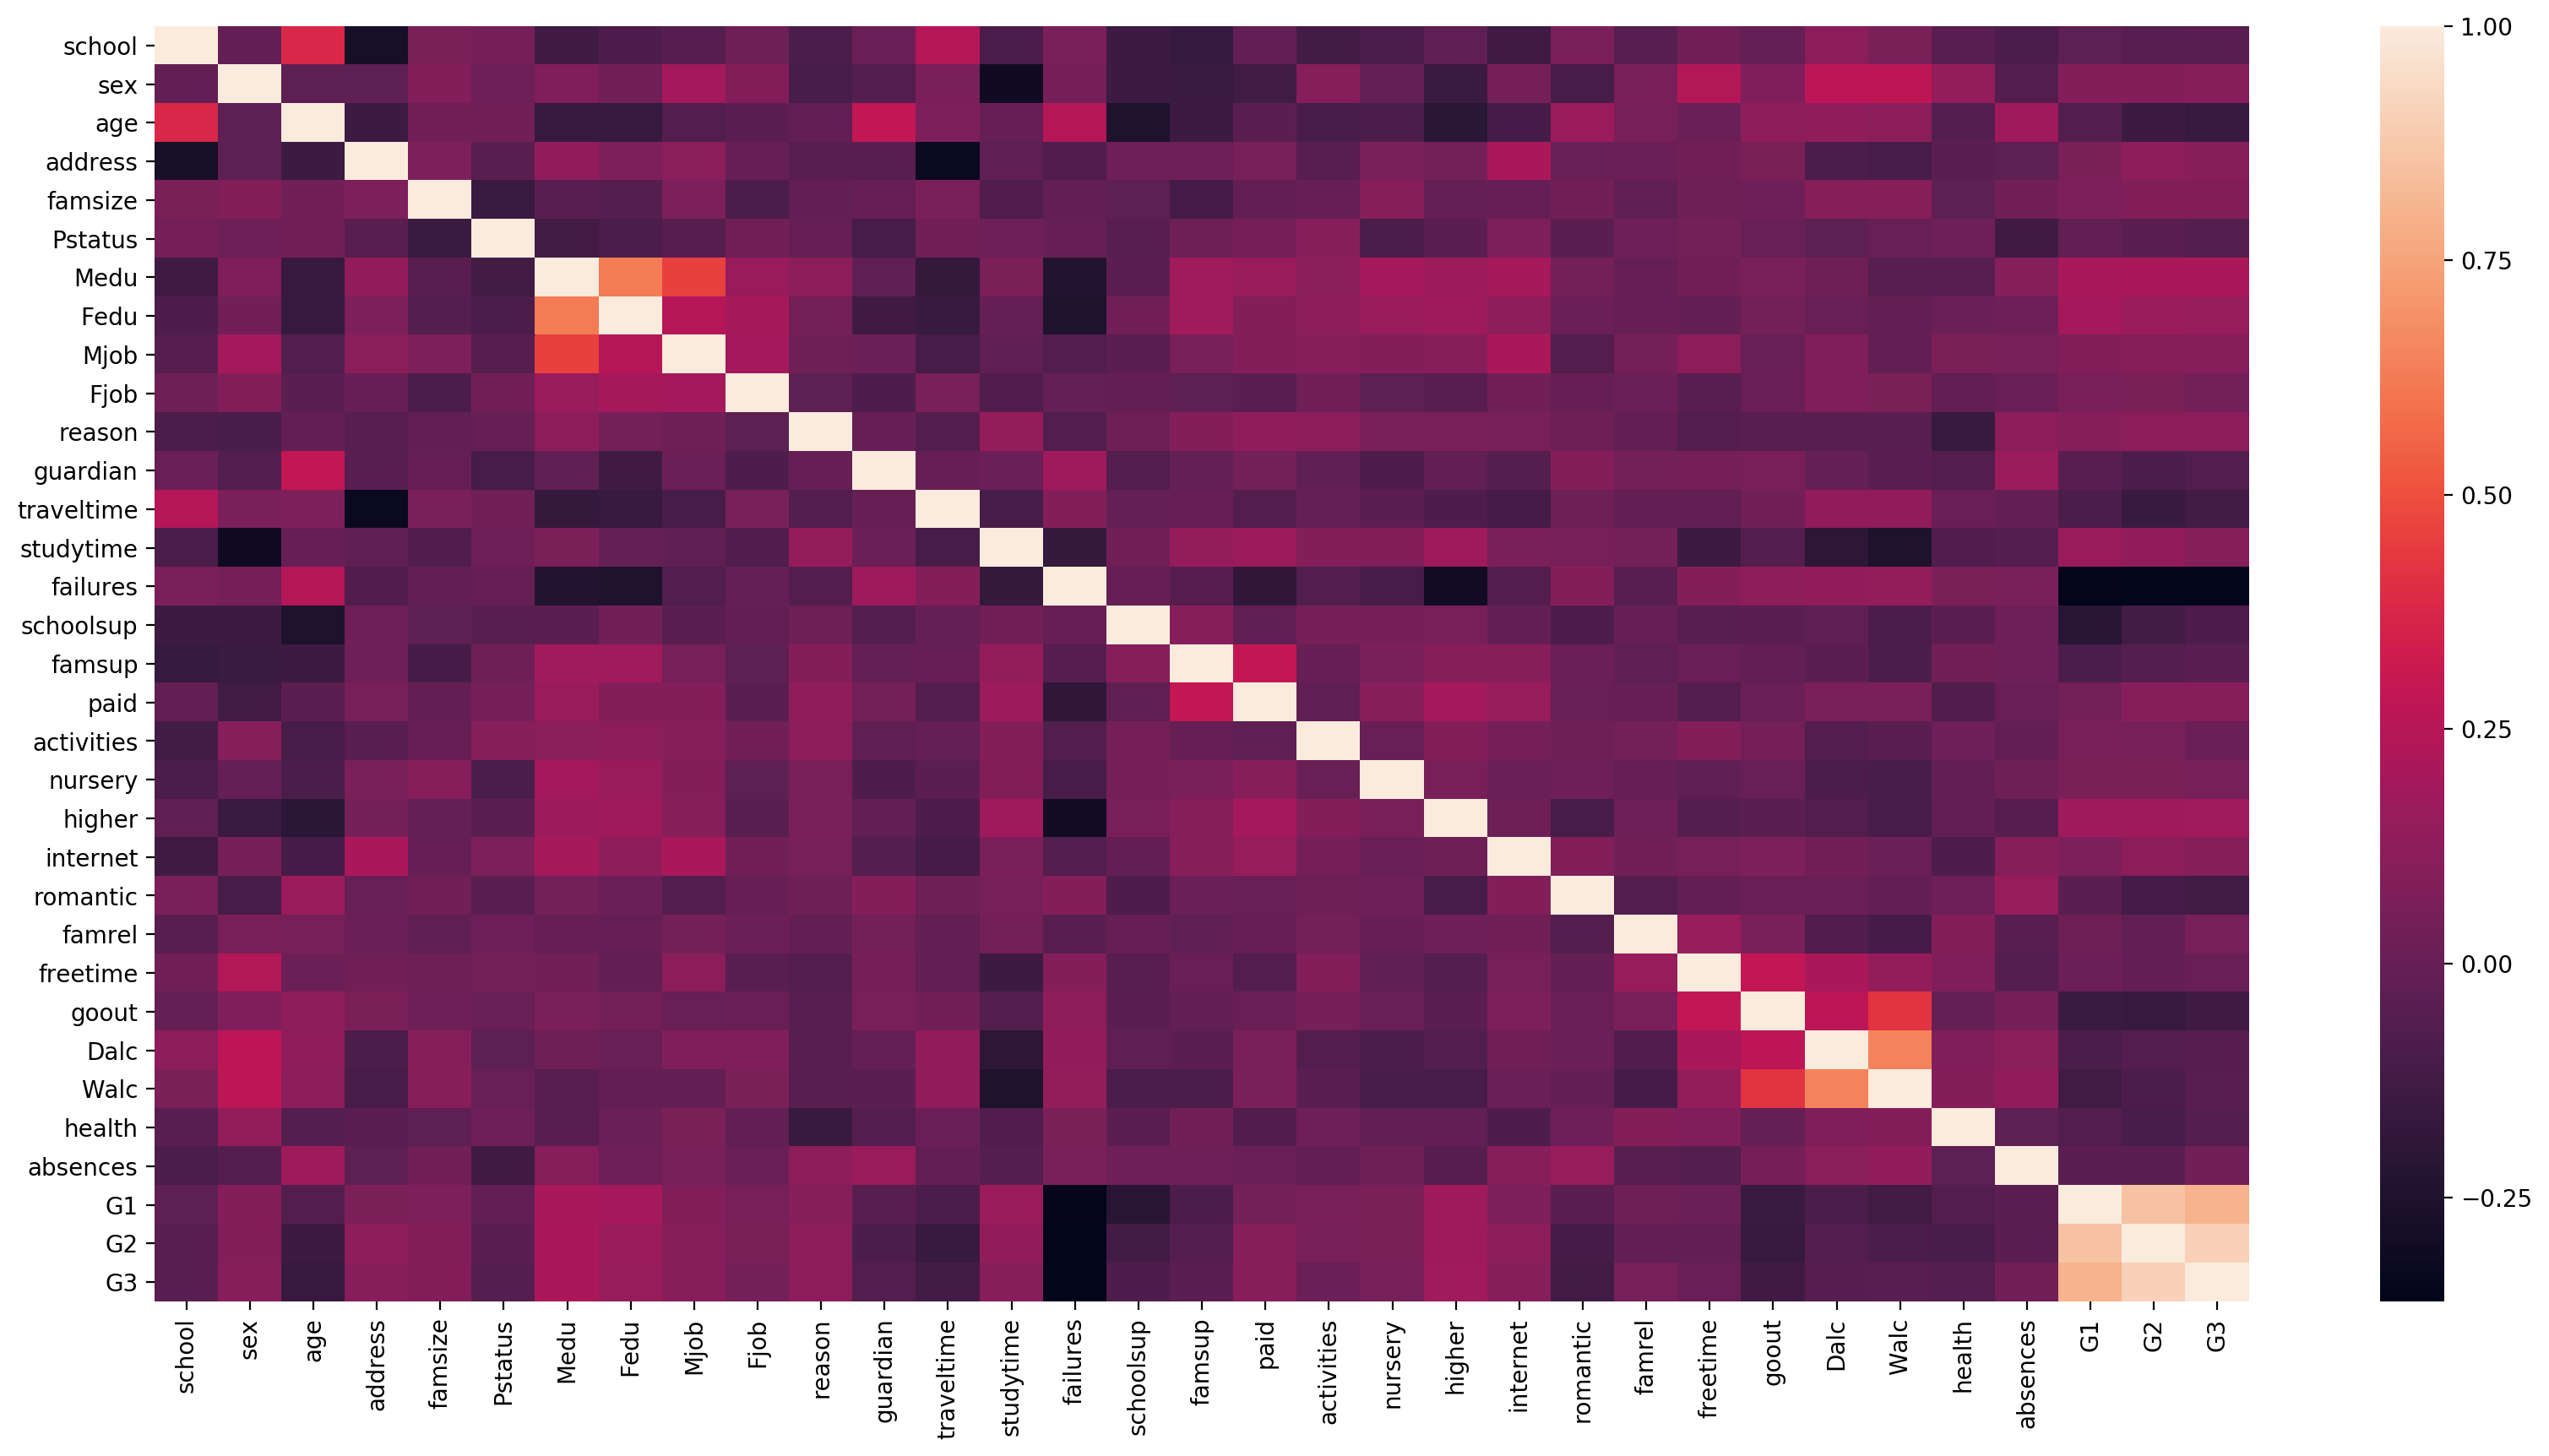

In [10]:
fig = plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(data.corr())


In [11]:
feature = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences']


In [12]:
G1_X = data[feature].values
G1_Y = data["G1"].values
G2_X = data[feature + ["G1"]].values
G2_Y = data["G2"].values
G3_X = data[feature + ["G2"]].values
G3_Y = data["G3"].values


In [13]:
G1_X = SelectKBest(chi2, k=20).fit_transform(G1_X, G1_Y)
G2_X = SelectKBest(chi2, k=10).fit_transform(G2_X, G2_Y)
G3_X = SelectKBest(chi2, k=10).fit_transform(G3_X, G3_Y)


In [14]:
grade_1 =  MLPClassifier(hidden_layer_sizes=(100,),alpha=0.0001,max_iter=1000)
grade_2 =  MLPClassifier(hidden_layer_sizes=(100,),alpha=0.0001,max_iter=3000)
grade_3 =  MLPClassifier(hidden_layer_sizes=(100,),alpha=0.0001,max_iter=3000)


In [15]:
G1_train_X,G1_test_X, G1_train_Y,G1_test_Y = train_test_split(G1_X,G1_Y,test_size=0.2)
G2_train_X,G2_test_X, G2_train_Y,G2_test_Y = train_test_split(G2_X,G2_Y,test_size=0.2)
G3_train_X,G3_test_X, G3_train_Y,G3_test_Y = train_test_split(G3_X,G3_Y,test_size=0.2)


In [16]:
grade_1.fit(G1_X, G1_Y)
grade_2.fit(G2_X,G2_Y)
grade_3.fit(G3_X,G3_Y)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
grade_1.score(G1_test_X,G1_test_Y)

1.0

In [18]:
grade_2.score(G2_test_X,G2_test_Y)


0.9367088607594937

In [19]:
grade_3.score(G3_test_X,G3_test_Y)

0.9873417721518988

In [20]:
print(classification_report(G1_Y, grade_1.predict(G1_X)))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         7
           6       1.00      0.96      0.98        24
           7       1.00      0.97      0.99        37
           8       0.98      0.98      0.98        41
           9       1.00      1.00      1.00        31
          10       0.98      1.00      0.99        51
          11       0.97      0.97      0.97        39
          12       0.94      0.97      0.96        35
          13       1.00      1.00      1.00        33
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        22
          17       1.00      1.00      1.00         8
          18       1.00      1.00      1.00         8
          19       1.00      1.00      1.00         3

   micro avg       0.99   

In [21]:
print(classification_report(G2_Y, grade_2.predict(G2_X)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        21
           8       0.97      0.97      0.97        32
           9       0.96      0.92      0.94        50
          10       0.84      0.89      0.86        46
          11       0.94      0.86      0.90        35
          12       0.83      0.85      0.84        41
          13       0.89      0.89      0.89        37
          14       0.86      0.83      0.84        23
          15       0.86      0.88      0.87        34
          16       1.00      1.00      1.00        13
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00        12
          19       1.00      1.00      1.00         3

   micro avg       0.92   

In [22]:
print(classification_report(G3_Y, grade_3.predict(G3_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        32
           9       1.00      0.96      0.98        28
          10       0.98      0.98      0.98        56
          11       1.00      1.00      1.00        47
          12       0.97      1.00      0.98        31
          13       0.97      1.00      0.98        31
          14       1.00      0.96      0.98        27
          15       1.00      0.97      0.98        33
          16       0.94      1.00      0.97        16
          17       1.00      1.00      1.00         6
          18       1.00      1.00      1.00        12
          19       1.00      1.00      1.00         5
          20       1.00    